___
___
## Data Preprocessing

import libraries

In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns 
import plotly.express as px        
plt.style.use('ggplot')         # use ggplot as theme for visuals
pd.set_option('display.max_columns', None)          # to make all columns of data frame display when make df.head()
%matplotlib inline  

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)          # to ignore warnings that not nessesary

___
import data from hugging face into data frame

In [3]:
data_link = "hf://datasets/alalfi/SupplyChainDataset/DataCoSupplyChainDataset1.csv"
df = pd.read_csv(data_link)

c:\Users\mahmo\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


___
data exploration 

In [4]:
df.head(10)         # display first 10 rows

,Type,Days_for_shipping_(real),Days_for_shipment_(scheduled),Benefit_per_order,Sales_per_customer,Delivery_Status,Late_delivery_risk,Category_Id,Category_Name,Customer_City,Customer_Country,Customer_Email,Customer_Fname,Customer_Id,Customer_Lname,Customer_Password,Customer_Segment,Customer_State,Customer_Street,Customer_Zipcode,Department_Id,Department_Name,Latitude,Longitude,Market,Order_City,Order_Country,Order_Customer_Id,order_date_(DateOrders),Order_Id,Order_Item_Cardprod_Id,Order_Item_Discount,Order_Item_Discount_Rate,Order_Item_Id,Order_Item_Product_Price,Order_Item_Profit_Ratio,Order_Item_Quantity,Sales,Order_Item_Total,Order_Profit_Per_Order,Order_Region,Order_State,Order_Status,Order_Zipcode,Product_Card_Id,Product_Category_Id,Product_Description,Product_Image,Product_Name,Product_Price,Product_Status,shipping_date_(DateOrders),Shipping_Mode
0,DEBIT,3,4,91.25000,314.64001,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.25145,-66.03706,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018,77202,1360,13.11,0.04,180517,328,0.29,1,327.75,314.64001,91.25,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018,Standard Class
1,TRANSFER,5,4,-249.09000,311.35999,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.27945,-66.03706,Pacific Asia,Bikaner,India,19492,1/13/2018,75939,1360,16.39,0.05,179254,328,-0.80,1,327.75,311.35999,-249.09,South Asia,Rajastan,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018,Standard Class
2,CASH,4,4,-247.78000,309.72000,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.29223,-121.88128,Pacific Asia,Bikaner,India,19491,1/13/2018,75938,1360,18.03,0.06,179253,328,-0.80,1,327.75,309.72000,-247.78,South Asia,Rajastan,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018,Standard Class
3,DEBIT,3,4,22.86000,304.81000,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.12595,-118.29102,Pacific Asia,Townsville,Australia,19490,1/13/2018,75937,1360,22.94,0.07,179252,328,0.08,1,327.75,304.81000,22.86,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018,Standard Class
4,PAYMENT,2,4,134.21001,298.25000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.25377,-66.03705,Pacific Asia,Townsville,Australia,19489,1/13/2018,75936,1360,29.50,0.09,179251,328,0.45,1,327.75,298.25000,134.21,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018,Standard Class
5,TRANSFER,6,4,18.58000,294.98001,Shipping canceled,0,73,Sporting Goods,Tonawanda,EE. UU.,XXXXXXXXX,Kimberly,19488,Flowers,XXXXXXXXX,Consumer,NY,2122 Hazy Corner,14150.0,2,Fitness,43.01397,-78.87907,Pacific Asia,Toowoomba,Australia,19488,1/13/2018,75935,1360,32.78,0.10,179250,328,0.06,1,327.75,294.98001,18.58,Oceania,Queensland,CANCELED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/19/2018,Standard Class
6,DEBIT,2,1,95.18000,288.42001,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Constance,19487,Terrell,XXXXXXXXX,Home Office,PR,1879 Green Pine Bank,725.0,2,Fitness,18.24254,-66.03706,Pacific Asia,Guangzhou,China,19487,1/13/2018,75934,1360,39.33,0.12,179249,328,0.33,1,327.75,288.42001,95.18,Eastern Asia,Guangdong,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018,First Class
7,TRANSFER,2,1,68.43

In [5]:
df.info()           # display some important info about every column in data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days_for_shipping_(real)       180519 non-null  int64  
 2   Days_for_shipment_(scheduled)  180519 non-null  int64  
 3   Benefit_per_order              180519 non-null  float64
 4   Sales_per_customer             180519 non-null  float64
 5   Delivery_Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category_Id                    180519 non-null  int64  
 8   Category_Name                  180519 non-null  object 
 9   Customer_City                  180519 non-null  object 
 10  Customer_Country               180519 non-null  object 
 11  Customer_Email                 180519 non-null  object 
 12  Customer_Fname                

In [6]:
df.isnull().sum().sum()         # check all nulls on data

np.int64(336206)

In [7]:
df.isnull().sum()           # check nulls for each column on data

Type                                  0
Days_for_shipping_(real)              0
Days_for_shipment_(scheduled)         0
Benefit_per_order                     0
Sales_per_customer                    0
Delivery_Status                       0
Late_delivery_risk                    0
Category_Id                           0
Category_Name                         0
Customer_City                         0
Customer_Country                      0
Customer_Email                        0
Customer_Fname                        0
Customer_Id                           0
Customer_Lname                        8
Customer_Password                     0
Customer_Segment                      0
Customer_State                        0
Customer_Street                       0
Customer_Zipcode                      3
Department_Id                         0
Department_Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [8]:
df.describe(include='number')           # display data description for numeric columns

,Days_for_shipping_(real),Days_for_shipment_(scheduled),Benefit_per_order,Sales_per_customer,Late_delivery_risk,Category_Id,Customer_Id,Customer_Zipcode,Department_Id,Latitude,Longitude,Order_Customer_Id,Order_Id,Order_Item_Cardprod_Id,Order_Item_Discount,Order_Item_Discount_Rate,Order_Item_Id,Order_Item_Product_Price,Order_Item_Profit_Ratio,Order_Item_Quantity,Sales,Order_Item_Total,Order_Profit_Per_Order,Order_Zipcode,Product_Card_Id,Product_Category_Id,Product_Description,Product_Price,Product_Status
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180516.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,24843.000000,180519.000000,180519.000000,0.0,180519.000000,180519.0
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,35921.126914,5.443460,29.719955,-84.915675,6691.379495,36221.894903,692.509764,20.664741,0.101668,90260.000000,141.245016,0.120647,2.127638,203.772097,183.107609,21.974989,55420.648070,692.509764,31.851451,NaN,141.232547,0.0
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,37542.461122,1.629246,9.813646,21.433241,4162.918106,21045.379569,336.446807,21.800901,0.070415,52111.490959,139.734859,0.466796,1.453451,132.273077,120.043670,104.433526,31921.252921,336.446807,15.640064,NaN,139.732489,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,603.000000,2.000000,-33.937550,-158.025990,1.000000,1.000000,19.000000,0.000000,0.000000,1.000000,10.000000,-2.750000,1.000000,9.990000,7.490000,-4274.980000,1040.000000,19.000000,2.000000,NaN,9.990000,0.0
25%,2.000000,2.000000,7.000000,104.380000,0.000000,18.000000,3258.500000,725.000000,4.000000,18.265430,-98.446310,3258.500000,18057.000000,403.000000,5.400000,0.040000,45130.500000,50.000000,0.080000,1.000000,119.980000,104.380000,7.000000,23464.000000,403.000000,18.000000,NaN,50.000000,0.0
50%,3.000000,4.000000,31.520000,163.990010,1.000000,29.000000,6457.000000,19380.000000,5.000000,33.144860,-76.847910,6457.000000,36140.000000,627.000000,14.000000,0.100000,90260.000000,60.000000,0.270000,1.000000,199.920000,163.990010,31.520000,59405.000000,627.000000,29.000000,NaN,59.990000,0.0
75%,5.000000,4.000000,64.800000,247.399990,1.000000,45.000000,9779.000000,78207.000000,7.000000,39.279620,-66.370580,9779.000000,54144.000000,1004.000000,29.990000,0.160000,135389.500000,200.000000,0.360000,3.000000,299.950010,247.399990,64.800000,90008.000000,1004.000000,45.000000,NaN,199.990000,0.0
max,6.000000,4.000000,911.799990,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781930,115.263080,20757.000000,77204.000000,1363.000000,500.000000,0.250000,180519.000000,2000.000000,0.500000,5.000000,1999.989990,1939.989990,911.800000,99301.000000,1363.000000,76.000000,NaN,1999.990000,0.0


In [9]:
df.describe(include='object')           # display data description for categorical columns

,Type,Delivery_Status,Category_Name,Customer_City,Customer_Country,Customer_Email,Customer_Fname,Customer_Lname,Customer_Password,Customer_Segment,Customer_State,Customer_Street,Department_Name,Market,Order_City,Order_Country,order_date_(DateOrders),Order_Region,Order_State,Order_Status,Product_Image,Product_Name,shipping_date_(DateOrders),Shipping_Mode
count,180519,180519,180519,180519,180519,180519,180519,180511,180519,180519,180519,180519,180519,180519,180519,180519,180519,180519,180519,180519,180519,180519,180519,180519
unique,4,4,50,563,2,1,782,1109,1,3,46,6953,11,5,3596,164,1127,23,1089,9,118,118,1131,4
top,DEBIT,Late delivery,Cleats,Caguas,EE. UU.,XXXXXXXXX,Mary,Smith,XXXXXXXXX,Consumer,PR,9126 Wishing Expressway,Fan Shop,LATAM,Santo Domingo,Estados Unidos,7/2/2017,Central America,Inglaterra,COMPLETE,http://images.acmesports.sports/Perfect+Fitnes...,Perfect Fitness Perfect Rip Deck,9/27/2017,Standard Class
freq,69295,98977,24551,66770,111146,180519,65150,64104,180519,93504,69373,124,66861,51594,2211,24840,220,28341,6722,59491,24515,24515,266,107752


___
select important columns that will be important in analysis

In [ ]:
df = df[['Order_Id',   
         'Type',
         'Days_for_shipping_(real)',
         'Days_for_shipment_(scheduled)',
         'Benefit_per_order',
         'Sales_per_customer',
         'Delivery_Status',
         'Late_delivery_risk',
         'Category_Name',
         'Customer_Country',
         'Customer_City',
         'Customer_Segment',
         'Department_Name',
         'Market',
         'Order_City',
         'Order_Country',
         'order_date_(DateOrders)',
         'Order_Item_Quantity',
         'Sales',
         'Order_Region',
         'Order_Status',
         'Product_Name',
         'Product_Price',
         'shipping_date_(DateOrders)',
         'Shipping_Mode',
         'Order_Item_Total',
        ]]

df.head(7)              # display selected data

,Type,Days_for_shipping_(real),Days_for_shipment_(scheduled),Benefit_per_order,Sales_per_customer,Delivery_Status,Late_delivery_risk,Category_Name,Customer_Country,Customer_City,Customer_Segment,Department_Name,Market,Order_City,Order_Country,order_date_(DateOrders),Order_Item_Quantity,Sales,Order_Region,Order_Status,Product_Name,Product_Price,shipping_date_(DateOrders),Shipping_Mode,Order_Item_Total
0,DEBIT,3,4,91.25000,314.64001,Advance shipping,0,Sporting Goods,Puerto Rico,Caguas,Consumer,Fitness,Pacific Asia,Bekasi,Indonesia,1/31/2018,1,327.75,Southeast Asia,COMPLETE,Smart watch,327.75,2/3/2018,Standard Class,314.64001
1,TRANSFER,5,4,-249.09000,311.35999,Late delivery,1,Sporting Goods,Puerto Rico,Caguas,Consumer,Fitness,Pacific Asia,Bikaner,India,1/13/2018,1,327.75,South Asia,PENDING,Smart watch,327.75,1/18/2018,Standard Class,311.35999
2,CASH,4,4,-247.78000,309.72000,Shipping on time,0,Sporting Goods,EE. UU.,San Jose,Consumer,Fitness,Pacific Asia,Bikaner,India,1/13/2018,1,327.75,South Asia,CLOSED,Smart watch,327.75,1/17/2018,Standard Class,309.72000
3,DEBIT,3,4,22.86000,304.81000,Advance shipping,0,Sporting Goods,EE. UU.,Los Angeles,Home Office,Fitness,Pacific Asia,Townsville,Australia,1/13/2018,1,327.75,Oceania,COMPLETE,Smart watch,327.75,1/16/2018,Standard Class,304.81000
4,PAYMENT,2,4,134.21001,298.25000,Advance shipping,0,Sporting Goods,Puerto Rico,Caguas,Corporate,Fitness,Pacific Asia,Townsville,Australia,1/13/2018,1,327.75,Oceania,PENDING_PAYMENT,Smart watch,327.75,1/15/2018,Standard Class,298.25000
5,TRANSFER,6,4,18.58000,294.98001,Shipping canceled,0,Sporting Goods,EE. UU.,Tonawanda,Consumer,Fitness,Pacific Asia,Toowoomba,Australia,1/13/2018,1,327.75,Oceania,CANCELED,Smart watch,327.75,1/19/2018,Standard Class,294.98001
6,DEBIT,2,1,95.18000,288.42001,Late delivery,1,Sporting Goods,Puerto Rico,Caguas,Home Office,Fitness,Pacific Asia,Guangzhou,China,1/13/2018,1,327.75,Eastern Asia,COMPLETE,Smart watch,327.75,1/15/2018,First Class,288.42001


##### Dataset Card
| Column Name                     | Type        | Description (Assumed)                 |
| ------------------------------- | ----------- | ------------------------------------- |
| `Type`                          | Categorical | Order type or transaction type        |
| `Days_for_shipping_(real)`      | Numeric     | Actual number of days taken to ship   |
| `Days_for_shipment_(scheduled)` | Numeric     | Scheduled days for shipment           |
| `Benefit_per_order`             | Numeric     | Profit or benefit from a single order |
| `Sales_per_customer`            | Numeric     | Total sales divided per customer      |
| `Delivery_Status`               | Categorical | Delivery status info                  |
| `Late_delivery_risk`            | Binary      | Indicator of risk (0 = No, 1 = Yes)   |
| `Category_Name`                 | Categorical | Product category name                 |
| `Customer_Country`              | Categorical | Country where customer resides        |
| `Customer_City`                 | Categorical | Customer’s city                       |
| `Customer_Segment`              | Categorical | Segment: Consumer, Corporate, etc.    |
| `Department_Name`               | Categorical | Department handling the order         |
| `Market`                        | Categorical | Market region or category             |
| `Order_City`                    | Categorical | City where order was placed           |
| `Order_Country`                 | Categorical | Country where order was placed        |
| `order_date_(DateOrders)`       | Date        | Order date                            |
| `Order_Item_Quantity`           | Numeric     | Quantity of product in the order      |
| `Sales`                         | Numeric     | Total sales value of the order        |
| `Order_Region`                  | Categorical | Region where the order was placed     |
| `Order_Status`                  | Categorical | Status of the order                   |
| `Product_Name`                  | Text        | Name of the product                   |
| `Product_Price`                 | Numeric     | Original price of the product         |
| `shipping_date_(DateOrders)`    | Date        | Actual shipping date                  |
| `Shipping_Mode`                 | Categorical | Shipping method used                  |
| `Order_Item_Total`              | Numeric     | Total amount for the item(s) ordered  |



In [11]:
df.info()           # display some important info about every column in data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days_for_shipping_(real)       180519 non-null  int64  
 2   Days_for_shipment_(scheduled)  180519 non-null  int64  
 3   Benefit_per_order              180519 non-null  float64
 4   Sales_per_customer             180519 non-null  float64
 5   Delivery_Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category_Name                  180519 non-null  object 
 8   Customer_Country               180519 non-null  object 
 9   Customer_City                  180519 non-null  object 
 10  Customer_Segment               180519 non-null  object 
 11  Department_Name                180519 non-null  object 
 12  Market                        

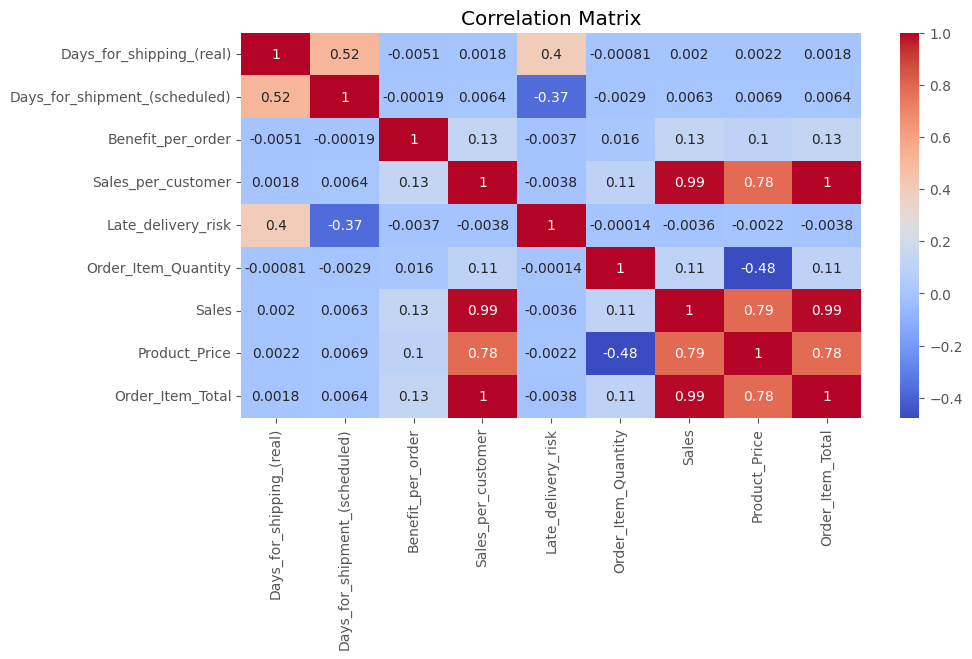

In [12]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()          # show corr between each coulmn

In [13]:
for col in df.columns:           
    print(col)
    print(df[col].unique())
    print('____________________________________________________________','\n')            # show unique values for each coulmn

Type
['DEBIT' 'TRANSFER' 'CASH' 'PAYMENT']
____________________________________________________________ 

Days_for_shipping_(real)
[3 5 4 2 6 0 1]
____________________________________________________________ 

Days_for_shipment_(scheduled)
[4 1 2 0]
____________________________________________________________ 

Benefit_per_order
[  91.25    -249.09    -247.78    ... -103.97    -237.59    -337.10001]
____________________________________________________________ 

Sales_per_customer
[314.64001 311.35999 309.72    ... 298.76999 403.70999 474.76001]
____________________________________________________________ 

Delivery_Status
['Advance shipping' 'Late delivery' 'Shipping on time' 'Shipping canceled']
____________________________________________________________ 

Late_delivery_risk
[0 1]
____________________________________________________________ 

Category_Name
['Sporting Goods' 'Cleats' 'Shop By Sport' "Women's Apparel" 'Electronics'
 'Boxing & MMA' 'Cardio Equipment' 'Trade-In' "Kids' G

___
data cleaning

In [14]:
for col in df.columns:          
    if df[col].dtype == 'object':
        df[col] = df[col].str.title()           # convert any text column to be titeled

In [15]:
df['Late_delivery_risk'] = df['Late_delivery_risk'].replace({0:"No", 1:"Yes"})          # convert data from 0,1 to yes, no 
df['Shipping_Mode'] = df['Shipping_Mode'].replace('Same Day','First Class')         # convert same day to first class
df['Customer_Country'] = df['Customer_Country'].replace({"EE. UU.": "United States",})          # modify the country names   

In [16]:
date_columns = [col for col in df.columns if "date" in col.lower()]
for col in date_columns:
    try:
        df[col] = pd.to_datetime(df[col], errors='coerce')          # convert date columns type to datetime type
    except:
        pass

In [17]:
print(df[['order_date_(DateOrders)','shipping_date_(DateOrders)']].dtypes)            # check date columns data type

order_date_(DateOrders)       datetime64[ns]
shipping_date_(DateOrders)    datetime64[ns]
dtype: object


In [18]:
df.drop_duplicates(inplace = True)          # drop duplicates

In [19]:
df.head(7)

,Type,Days_for_shipping_(real),Days_for_shipment_(scheduled),Benefit_per_order,Sales_per_customer,Delivery_Status,Late_delivery_risk,Category_Name,Customer_Country,Customer_City,Customer_Segment,Department_Name,Market,Order_City,Order_Country,order_date_(DateOrders),Order_Item_Quantity,Sales,Order_Region,Order_Status,Product_Name,Product_Price,shipping_date_(DateOrders),Shipping_Mode,Order_Item_Total
0,Debit,3,4,91.25000,314.64001,Advance Shipping,No,Sporting Goods,Puerto Rico,Caguas,Consumer,Fitness,Pacific Asia,Bekasi,Indonesia,2018-01-31,1,327.75,Southeast Asia,Complete,Smart Watch,327.75,2018-02-03,Standard Class,314.64001
1,Transfer,5,4,-249.09000,311.35999,Late Delivery,Yes,Sporting Goods,Puerto Rico,Caguas,Consumer,Fitness,Pacific Asia,Bikaner,India,2018-01-13,1,327.75,South Asia,Pending,Smart Watch,327.75,2018-01-18,Standard Class,311.35999
2,Cash,4,4,-247.78000,309.72000,Shipping On Time,No,Sporting Goods,Ee. Uu.,San Jose,Consumer,Fitness,Pacific Asia,Bikaner,India,2018-01-13,1,327.75,South Asia,Closed,Smart Watch,327.75,2018-01-17,Standard Class,309.72000
3,Debit,3,4,22.86000,304.81000,Advance Shipping,No,Sporting Goods,Ee. Uu.,Los Angeles,Home Office,Fitness,Pacific Asia,Townsville,Australia,2018-01-13,1,327.75,Oceania,Complete,Smart Watch,327.75,2018-01-16,Standard Class,304.81000
4,Payment,2,4,134.21001,298.25000,Advance Shipping,No,Sporting Goods,Puerto Rico,Caguas,Corporate,Fitness,Pacific Asia,Townsville,Australia,2018-01-13,1,327.75,Oceania,Pending_Payment,Smart Watch,327.75,2018-01-15,Standard Class,298.25000
5,Transfer,6,4,18.58000,294.98001,Shipping Canceled,No,Sporting Goods,Ee. Uu.,Tonawanda,Consumer,Fitness,Pacific Asia,Toowoomba,Australia,2018-01-13,1,327.75,Oceania,Canceled,Smart Watch,327.75,2018-01-19,Standard Class,294.98001
6,Debit,2,1,95.18000,288.42001,Late Delivery,Yes,Sporting Goods,Puerto Rico,Caguas,Home Office,Fitness,Pacific Asia,Guangzhou,China,2018-01-13,1,327.75,Eastern Asia,Complete,Smart Watch,327.75,2018-01-15,First Class,288.42001


In [20]:
 df.isnull().sum().sum()         # show if there nulls on data 

np.int64(0)

In [21]:
# Final report
print(" Data cleaning complete!")
print(f" Final shape: {df.shape}")
print(" Columns:")
for col in df.columns:
    print(f' -    {col}')
print(" Remaining missing values:\n", df.isnull().sum().sum())

 Data cleaning complete!
 Final shape: (180519, 25)
 Columns:
 -    Type
 -    Days_for_shipping_(real)
 -    Days_for_shipment_(scheduled)
 -    Benefit_per_order
 -    Sales_per_customer
 -    Delivery_Status
 -    Late_delivery_risk
 -    Category_Name
 -    Customer_Country
 -    Customer_City
 -    Customer_Segment
 -    Department_Name
 -    Market
 -    Order_City
 -    Order_Country
 -    order_date_(DateOrders)
 -    Order_Item_Quantity
 -    Sales
 -    Order_Region
 -    Order_Status
 -    Product_Name
 -    Product_Price
 -    shipping_date_(DateOrders)
 -    Shipping_Mode
 -    Order_Item_Total
 Remaining missing values:
 0


___
save cleaned data into csv file

In [22]:
# df.to_csv("cleand_data.csv",index = False)            # uncommint this line if you want cleaned data 
# # name of the file is cleaned_data.csv in same notebook directory

___
___
## Data Analysis

In [23]:
df.head(8)          # explore data

,Type,Days_for_shipping_(real),Days_for_shipment_(scheduled),Benefit_per_order,Sales_per_customer,Delivery_Status,Late_delivery_risk,Category_Name,Customer_Country,Customer_City,Customer_Segment,Department_Name,Market,Order_City,Order_Country,order_date_(DateOrders),Order_Item_Quantity,Sales,Order_Region,Order_Status,Product_Name,Product_Price,shipping_date_(DateOrders),Shipping_Mode,Order_Item_Total
0,Debit,3,4,91.25000,314.64001,Advance Shipping,No,Sporting Goods,Puerto Rico,Caguas,Consumer,Fitness,Pacific Asia,Bekasi,Indonesia,2018-01-31,1,327.75,Southeast Asia,Complete,Smart Watch,327.75,2018-02-03,Standard Class,314.64001
1,Transfer,5,4,-249.09000,311.35999,Late Delivery,Yes,Sporting Goods,Puerto Rico,Caguas,Consumer,Fitness,Pacific Asia,Bikaner,India,2018-01-13,1,327.75,South Asia,Pending,Smart Watch,327.75,2018-01-18,Standard Class,311.35999
2,Cash,4,4,-247.78000,309.72000,Shipping On Time,No,Sporting Goods,Ee. Uu.,San Jose,Consumer,Fitness,Pacific Asia,Bikaner,India,2018-01-13,1,327.75,South Asia,Closed,Smart Watch,327.75,2018-01-17,Standard Class,309.72000
3,Debit,3,4,22.86000,304.81000,Advance Shipping,No,Sporting Goods,Ee. Uu.,Los Angeles,Home Office,Fitness,Pacific Asia,Townsville,Australia,2018-01-13,1,327.75,Oceania,Complete,Smart Watch,327.75,2018-01-16,Standard Class,304.81000
4,Payment,2,4,134.21001,298.25000,Advance Shipping,No,Sporting Goods,Puerto Rico,Caguas,Corporate,Fitness,Pacific Asia,Townsville,Australia,2018-01-13,1,327.75,Oceania,Pending_Payment,Smart Watch,327.75,2018-01-15,Standard Class,298.25000
5,Transfer,6,4,18.58000,294.98001,Shipping Canceled,No,Sporting Goods,Ee. Uu.,Tonawanda,Consumer,Fitness,Pacific Asia,Toowoomba,Australia,2018-01-13,1,327.75,Oceania,Canceled,Smart Watch,327.75,2018-01-19,Standard Class,294.98001
6,Debit,2,1,95.18000,288.42001,Late Delivery,Yes,Sporting Goods,Puerto Rico,Caguas,Home Office,Fitness,Pacific Asia,Guangzhou,China,2018-01-13,1,327.75,Eastern Asia,Complete,Smart Watch,327.75,2018-01-15,First Class,288.42001
7,Transfer,2,1,68.43000,285.14001,Late Delivery,Yes,Sporting Goods,Ee. Uu.,Miami,Corporate,Fitness,Pacific Asia,Guangzhou,China,2018-01-13,1,327.75,Eastern Asia,Processing,Smart Watch,327.75,2018-01-15,First Class,285.14001


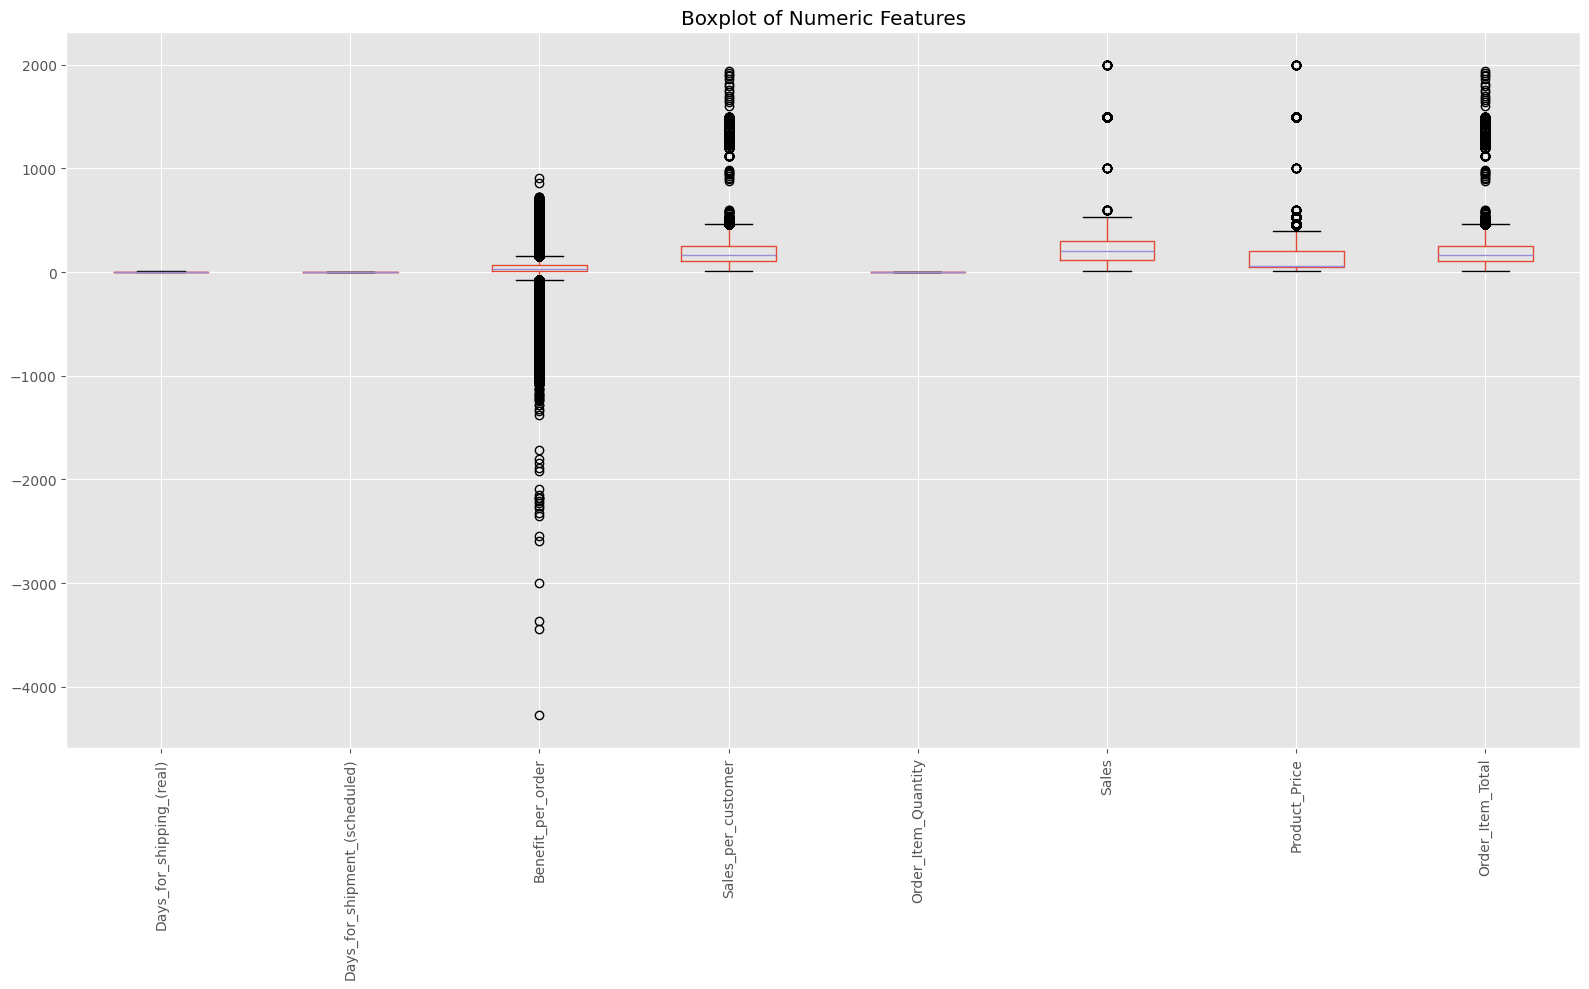

In [24]:
numeric_df = df.select_dtypes(include='number')

# Create a boxplot for each numeric column
plt.figure(figsize=(16, 10))
numeric_df.boxplot(rot=90)
plt.title('Boxplot of Numeric Features')
plt.tight_layout()
plt.show()


___
```
from this chart we notice that there is many negative values of benifit per order column  
that mean there is many saled operation in which the company loses.
```
___

In [25]:
outlier_summary = {}            # check for outliers in numeric columns

for col in numeric_df.columns:
    Q1 = numeric_df[col].quantile(0.25)
    Q3 = numeric_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = numeric_df[(numeric_df[col] < lower) | (numeric_df[col] > upper)]
    outlier_summary[col] = len(outliers)

# Display number of outliers per column
outlier_summary = dict(sorted(outlier_summary.items(), key=lambda x: -x[1]))
for k, v in outlier_summary.items():
    print(f"{k}: {v} outliers")


Benefit_per_order: 18942 outliers
Product_Price: 2048 outliers
Sales_per_customer: 1943 outliers
Order_Item_Total: 1943 outliers
Sales: 488 outliers
Days_for_shipping_(real): 0 outliers
Days_for_shipment_(scheduled): 0 outliers
Order_Item_Quantity: 0 outliers


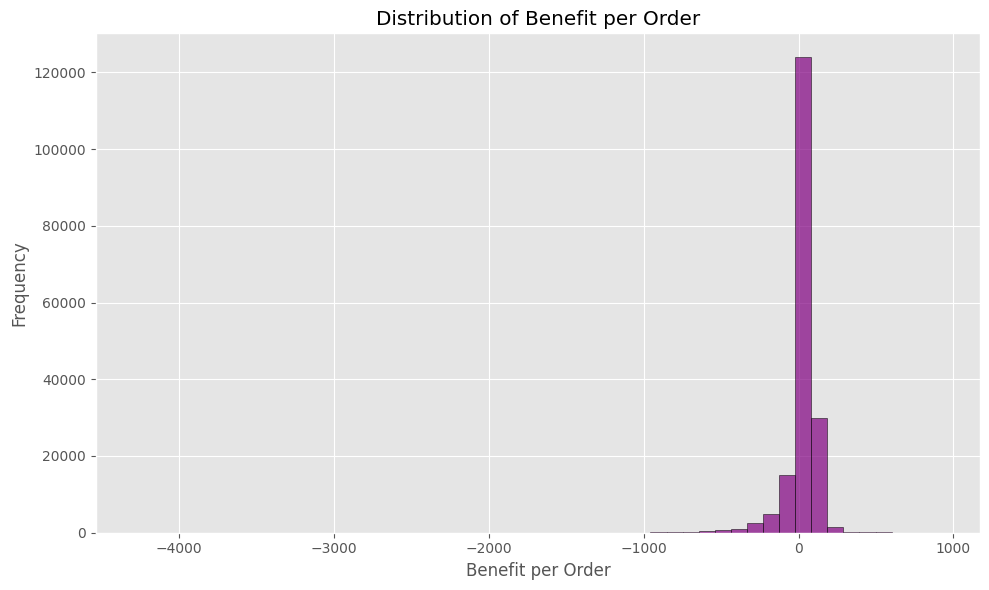

In [26]:
plt.figure(figsize=(10, 6))         
plt.hist(df['Benefit_per_order'], bins=50, color='purple', alpha=0.7, edgecolor='black')

plt.title('Distribution of Benefit per Order')
plt.xlabel('Benefit per Order')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()          # display plot for distribution of benefit per order column


___
```
from this chart we notice that the most of sales operations don't make profit and there is operations by negative!!  
is that mean the company is lossing ?!!
```
___

In [27]:
positive_profit = df[df['Benefit_per_order'] > 0]['Benefit_per_order'].sum()           # positive profit
negative_profit = df[df['Benefit_per_order'] < 0]['Benefit_per_order'].sum()           # negative profit
net_profit = positive_profit + negative_profit
print(f'The Net Profit value is = {net_profit}')

The Net Profit value is = 3966902.983859999


___
```
from calculate net profit we notice that although there are a large number of negative values, the net progit is positive overall  
which indicate that the company in making a profit.
```
___

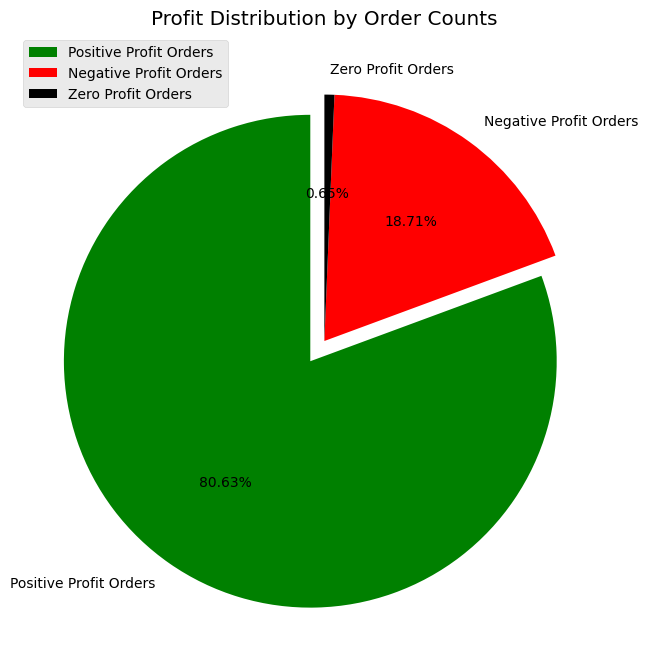

In [28]:
# Count the number of positive, negative, and zero profit orders
positive_count = len(df[df['Benefit_per_order'] > 0])
negative_count = len(df[df['Benefit_per_order'] < 0])
zero_count = len(df[df['Benefit_per_order'] == 0])

# Data for the pie chart (counts)
counts = [positive_count, negative_count, zero_count]
labels = ['Positive Profit Orders', 'Negative Profit Orders', 'Zero Profit Orders']
colors = ['green', 'red', 'black']


plt.figure(figsize=(8, 8))
plt.pie(counts, labels=labels,autopct='%1.2f%%', startangle=90, colors=colors, explode=(0.1, 0, 0))
plt.title('Profit Distribution by Order Counts')
plt.legend()
plt.show()


___
```
from this chart we notice that the most sales operaiones are profitable.  
-  80% of sales operations profit.
-  18.7% of sales operations loss.
-  0.63% of sales operations zero.
```
___

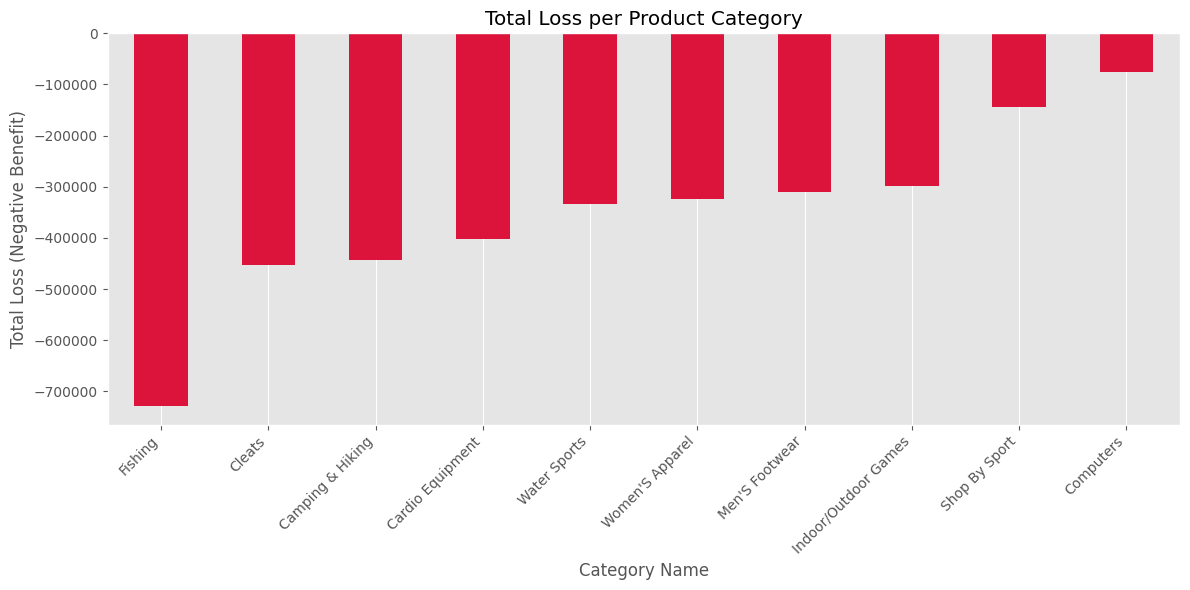

In [29]:
loss_df = df[df['Benefit_per_order'] < 0]
loss_by_category = loss_df.groupby('Category_Name')['Benefit_per_order'].sum().sort_values().head(10)

plt.figure(figsize=(12, 6))
loss_by_category.plot(kind='bar', color='crimson')

plt.title('Total Loss per Product Category')
plt.xlabel('Category Name')
plt.ylabel('Total Loss (Negative Benefit)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()          # visualize the top 10 products that make losses


___
```
in this chart we visualize the top 10 products that make losses
```
___

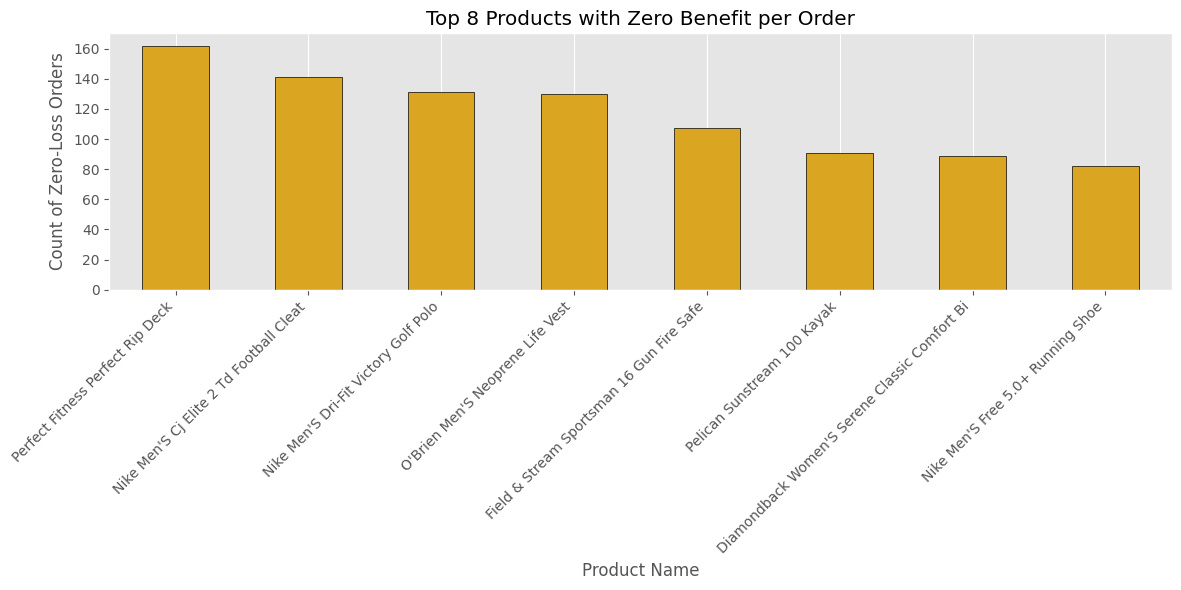

In [30]:
zero_loss_df = df[df['Benefit_per_order'] == 0]
zero_loss_counts = zero_loss_df['Product_Name'].value_counts().head(8)

plt.figure(figsize=(12, 6))
zero_loss_counts.plot(kind='bar', color='goldenrod', edgecolor='black')

plt.title('Top 8 Products with Zero Benefit per Order')
plt.xlabel('Product Name')
plt.ylabel('Count of Zero-Loss Orders')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()          # visualize the top 8 products that don't make profits 


___
```
in this chart we visualize the top 8 that don't make profits
```
___

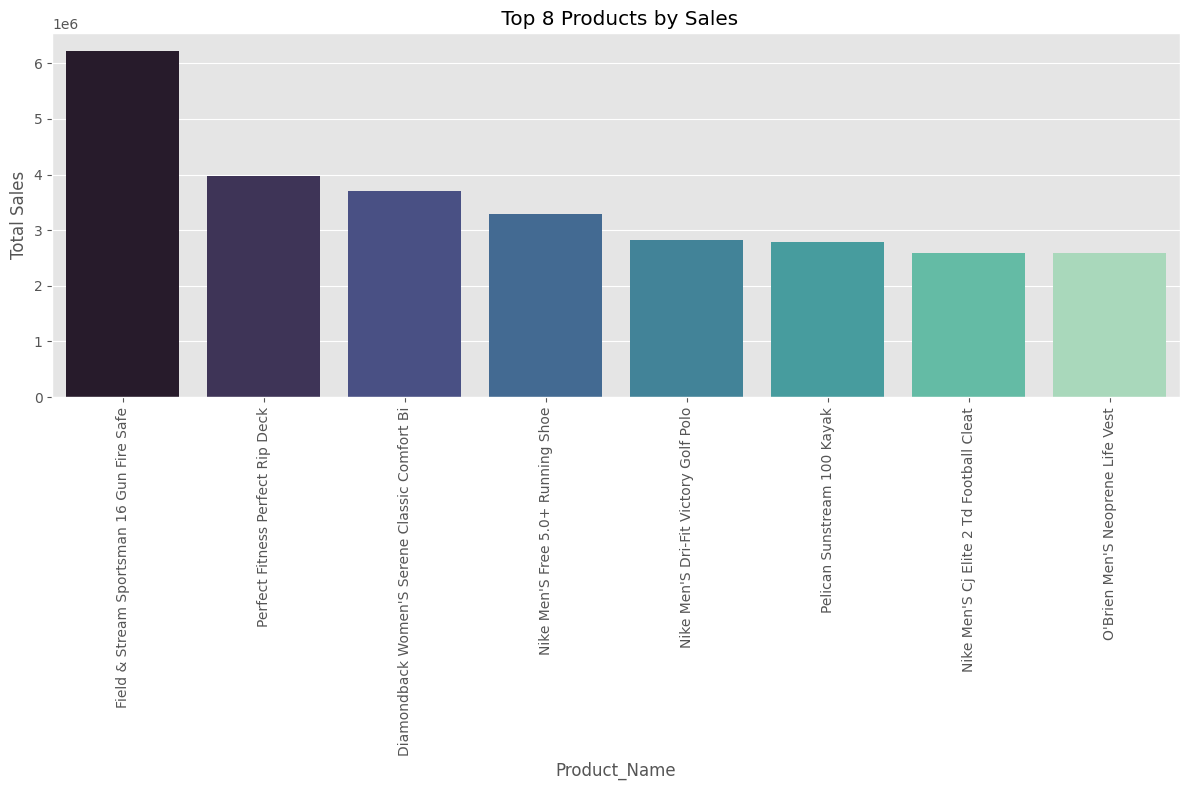

In [31]:
top_products = df.groupby('Product_Name')['Sales_per_customer'].sum().sort_values(ascending=False).head(8)

plt.figure(figsize=(12,8))
sns.barplot(x=top_products.index, y=top_products.values, palette="mako")
plt.title(' Top 8 Products by Sales')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()          # Top 5 Products by Sales

___
```
this is the top 8 profitabel products
```
___

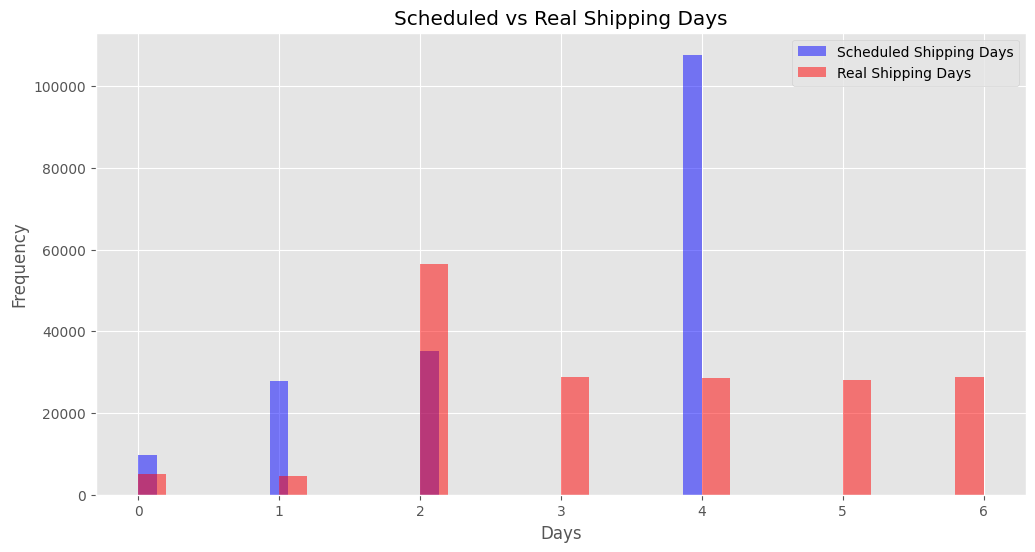

In [44]:
plt.figure(figsize=(12, 6))
plt.hist(df['Days_for_shipment_(scheduled)'], bins=30, color='blue', alpha=0.5, label='Scheduled Shipping Days')
plt.hist(df['Days_for_shipping_(real)'], bins=30, color='red', alpha=0.5, label='Real Shipping Days')

plt.xlabel('Days')
plt.ylabel('Frequency')
plt.title('Scheduled vs Real Shipping Days')
plt.legend()
plt.grid(True)
plt.show()          # this plot to compare between real shipping days and scheduled shipping days 


___
```
from this chart we notice that at most of time the shipping is delayed from the planned date, which may take up to 6 days in some cases.
```
___

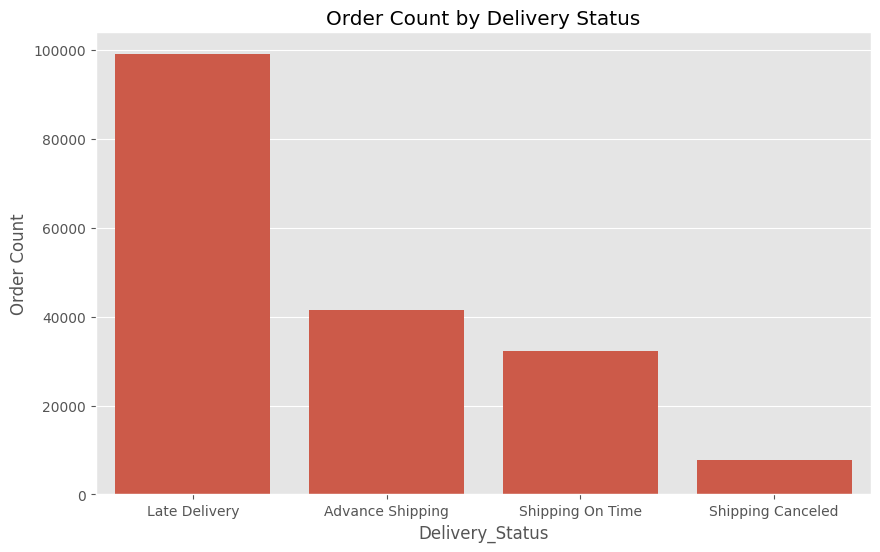

In [46]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Delivery_Status', order=df['Delivery_Status'].value_counts().index)
plt.title("Order Count by Delivery Status")
plt.ylabel("Order Count")
plt.show()          # Order Count by Delivery Status          

___
```
from this chart we notice that most of sales is late delivery, that mean this is a real problem should be solved.
```
___

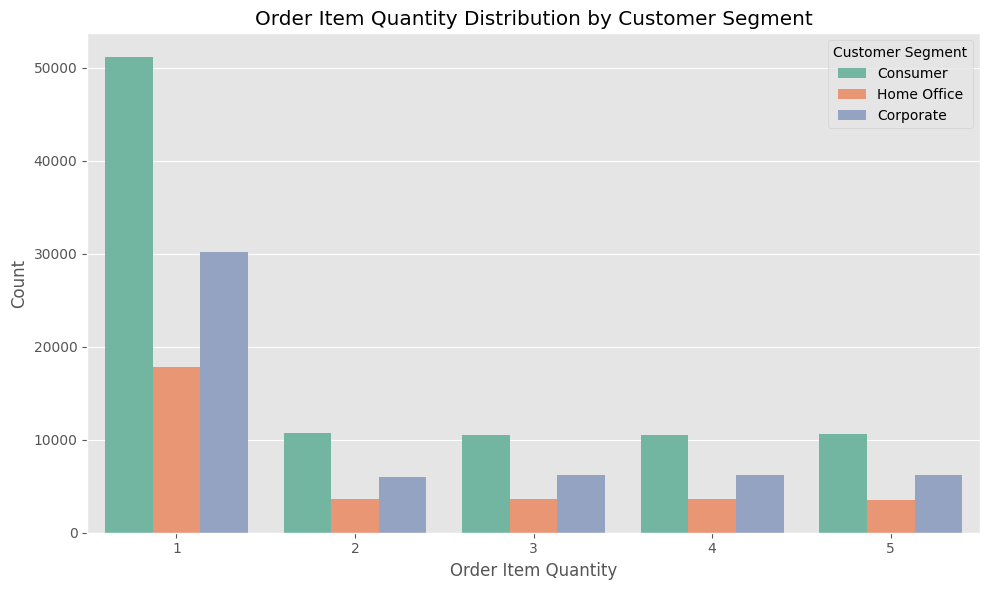

In [34]:

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Order_Item_Quantity', hue='Customer_Segment', palette='Set2')

plt.title('Order Item Quantity Distribution by Customer Segment')
plt.xlabel('Order Item Quantity')
plt.ylabel('Count')
plt.legend(title='Customer Segment')
plt.tight_layout()
plt.show()          # visualize the order item quantity distribution by customer segment


___
```
from this chart we notice that the consumer take the highest number of items, then corperates and home office in the last.
```
___

In [35]:
country_benefit = df.groupby('Order_Country')['Benefit_per_order'].sum().reset_index()
country_benefit.columns = ['country', 'benefit']

fig = px.choropleth(
    country_benefit,
    locations='country',
    locationmode='country names',
    color='benefit',
    color_continuous_scale='Viridis',
    title='Benefit per Country',
)

fig.show()          # show the map of country per benefit


___
```
this is interactive plot to visalize the countries and the density is for benifit.
```
___

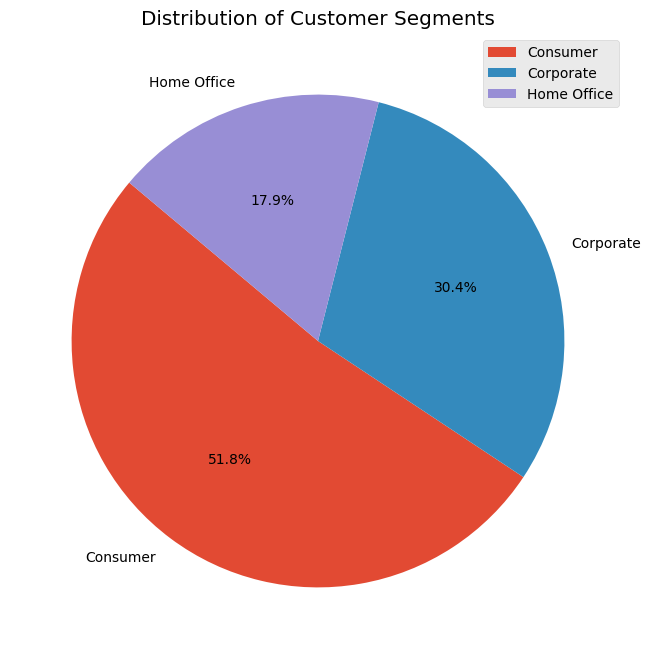

In [36]:
segment_counts = df['Customer_Segment'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Customer Segments')
plt.legend()
plt.show()

___
```
this is a pie chart of distribution of customer segment and the consumer is the highest.
```
___

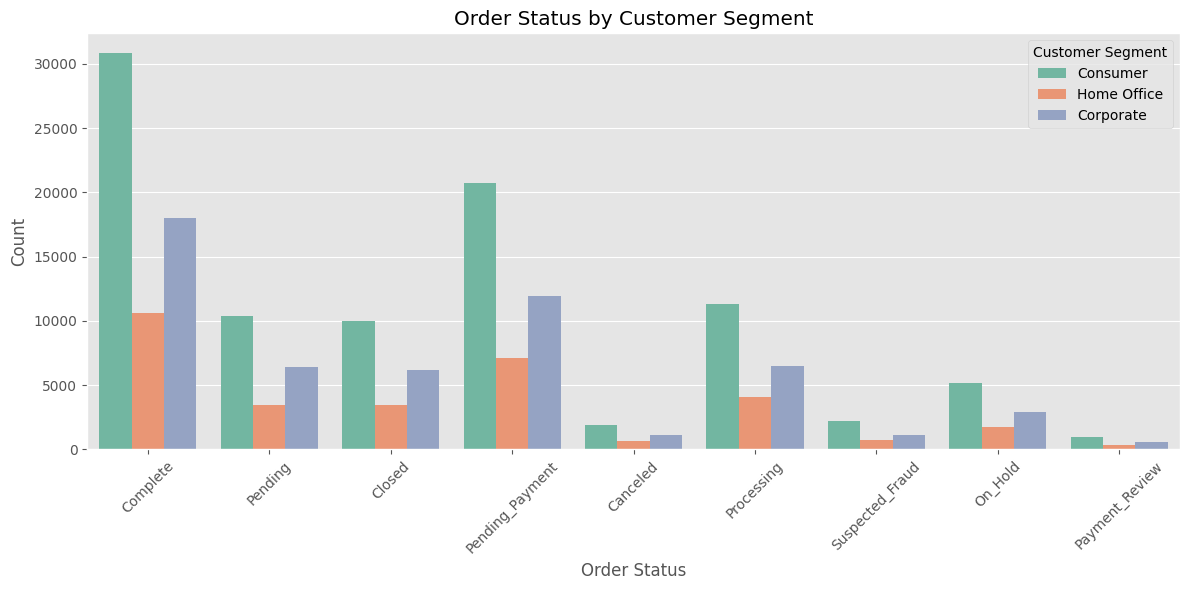

In [37]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Order_Status', hue='Customer_Segment', palette='Set2')

plt.title('Order Status by Customer Segment')
plt.xlabel('Order Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Customer Segment')
plt.tight_layout()
plt.show()

___
```
this is order status by customer segment, and we noticed that the most pending payments on home office category.
```
___

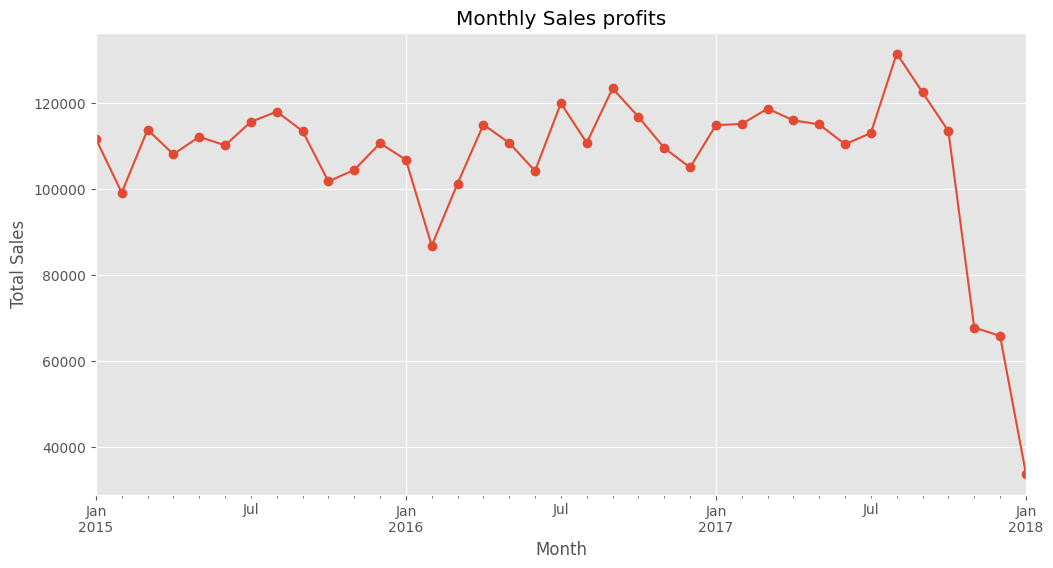

In [47]:
df['order_month'] = df['order_date_(DateOrders)'].dt.to_period('M')
monthly_sales = df.groupby('order_month')['Benefit_per_order'].sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', title='Monthly Sales profits')
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()          #this chart show time series for monthly sales over the year

___
```
this chart show time series for monthly sales over the year, and we notice that there is sharp drop in sales in the forth quarter of 2017.
```
___

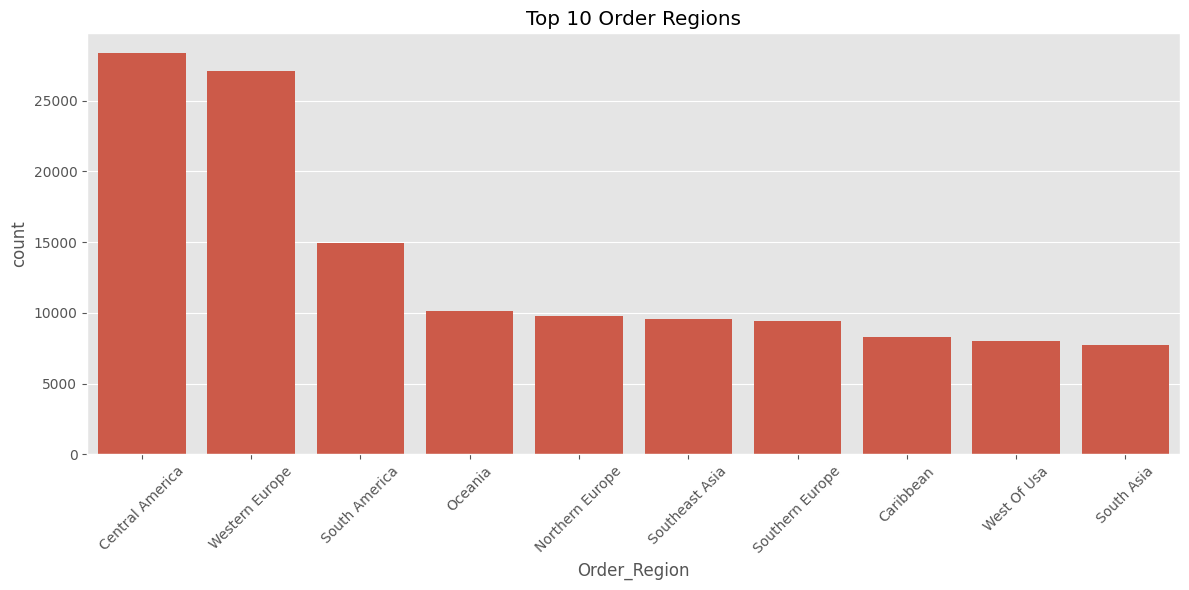

In [39]:
top_regions = df['Order_Region'].value_counts().nlargest(10).index 
filtered_df = df[df['Order_Region'].isin(top_regions)] 

plt.figure(figsize=(12,6))
sns.countplot(data=filtered_df, x='Order_Region', order=top_regions)
plt.title("Top 10 Order Regions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()          # the top 10 regions on number of orders

___
```
the top 10 region in number of orders, the top 1 is centeral america region.
```
___

___
___

## KPI

In [40]:
kpis = {
    "Total Profit": df['Benefit_per_order'].sum(),
    "Total Sales": df['Sales_per_customer'].sum(),
    "Total Orders": df.shape[0],
    "Average Order Value": df['Sales_per_customer'].mean(),
    "Top Product by Sales": df.groupby('Product_Name')['Sales_per_customer'].sum().idxmax(),
    "Average Shipping Days": df['Days_for_shipping_(real)'].mean(),
    "Late Delivery Rate (%)": df['Late_delivery_risk'].value_counts(normalize=True).get('Yes', 0) * 100,
    "On-Time Delivery Rate (%)": df['Late_delivery_risk'].value_counts(normalize=True).get('No', 0) * 100,
    "Average Profit per Order": df['Benefit_per_order'].mean(),
    "Loss-Making Orders Count": df[df['Benefit_per_order'] < 0].shape[0],
    "corr_real_scheduled": df['Days_for_shipping_(real)'].corr(df['Days_for_shipment_(scheduled)']),
    "Top Country by Sales": df.groupby('Customer_Country')['Sales_per_customer'].sum().idxmax(),
    "Top Region by Orders": df['Order_Region'].value_counts().idxmax(),
}           # important key performance indicators.

In [41]:
descriptions = {
    "Total Profit": " Net profit across all orders — shows overall business health.",
    "Total Sales": "Total revenue from all orders — measures overall financial performance.",
    "Total Orders": " Number of orders — reflects sales volume and customer activity.",
    "Average Order Value": " Average amount spent per order — helps with pricing and upsell decisions.",
    "Top Product by Sales": " Best-selling product — ideal for inventory planning and promotions.",
    "Average Shipping Days": " Average time to deliver — shorter times lead to better customer satisfaction.",
    "Late Delivery Rate (%)": " % of orders at risk of delay — high values indicate logistical issues.",
    "On-Time Delivery Rate (%)": " % of orders delivered on time — higher is better for trust and loyalty.",
    "Average Profit per Order": " Profitability per order — helps assess how efficiently the business earns.",
    "Loss-Making Orders Count": " Number of orders with negative profit — should be minimized.",
    "corr_real_scheduled": "correlation between real days for shipping and scheduled days for shipping",
    "Top Country by Sales": " Country contributing most sales — prioritize marketing or expansion here.",
    "Top Region by Orders": " Region with highest order volume — operational or sales hotspot.",
}           # KPI Descriptions

In [42]:
for kpi, value in kpis.items():
    print(f"{kpi}: {value}")
    print(f"➡️  {descriptions[kpi]}")
    print("-" * 60)         # Display KPIs with explanations

Total Profit: 3966902.9838600005
➡️   Net profit across all orders — shows overall business health.
------------------------------------------------------------
Total Sales: 33054402.475660004
➡️  Total revenue from all orders — measures overall financial performance.
------------------------------------------------------------
Total Orders: 180519
➡️   Number of orders — reflects sales volume and customer activity.
------------------------------------------------------------
Average Order Value: 183.10760903650032
➡️   Average amount spent per order — helps with pricing and upsell decisions.
------------------------------------------------------------
Top Product by Sales: Field & Stream Sportsman 16 Gun Fire Safe
➡️   Best-selling product — ideal for inventory planning and promotions.
------------------------------------------------------------
Average Shipping Days: 3.4976539865609713
➡️   Average time to deliver — shorter times lead to better customer satisfaction.
----------------

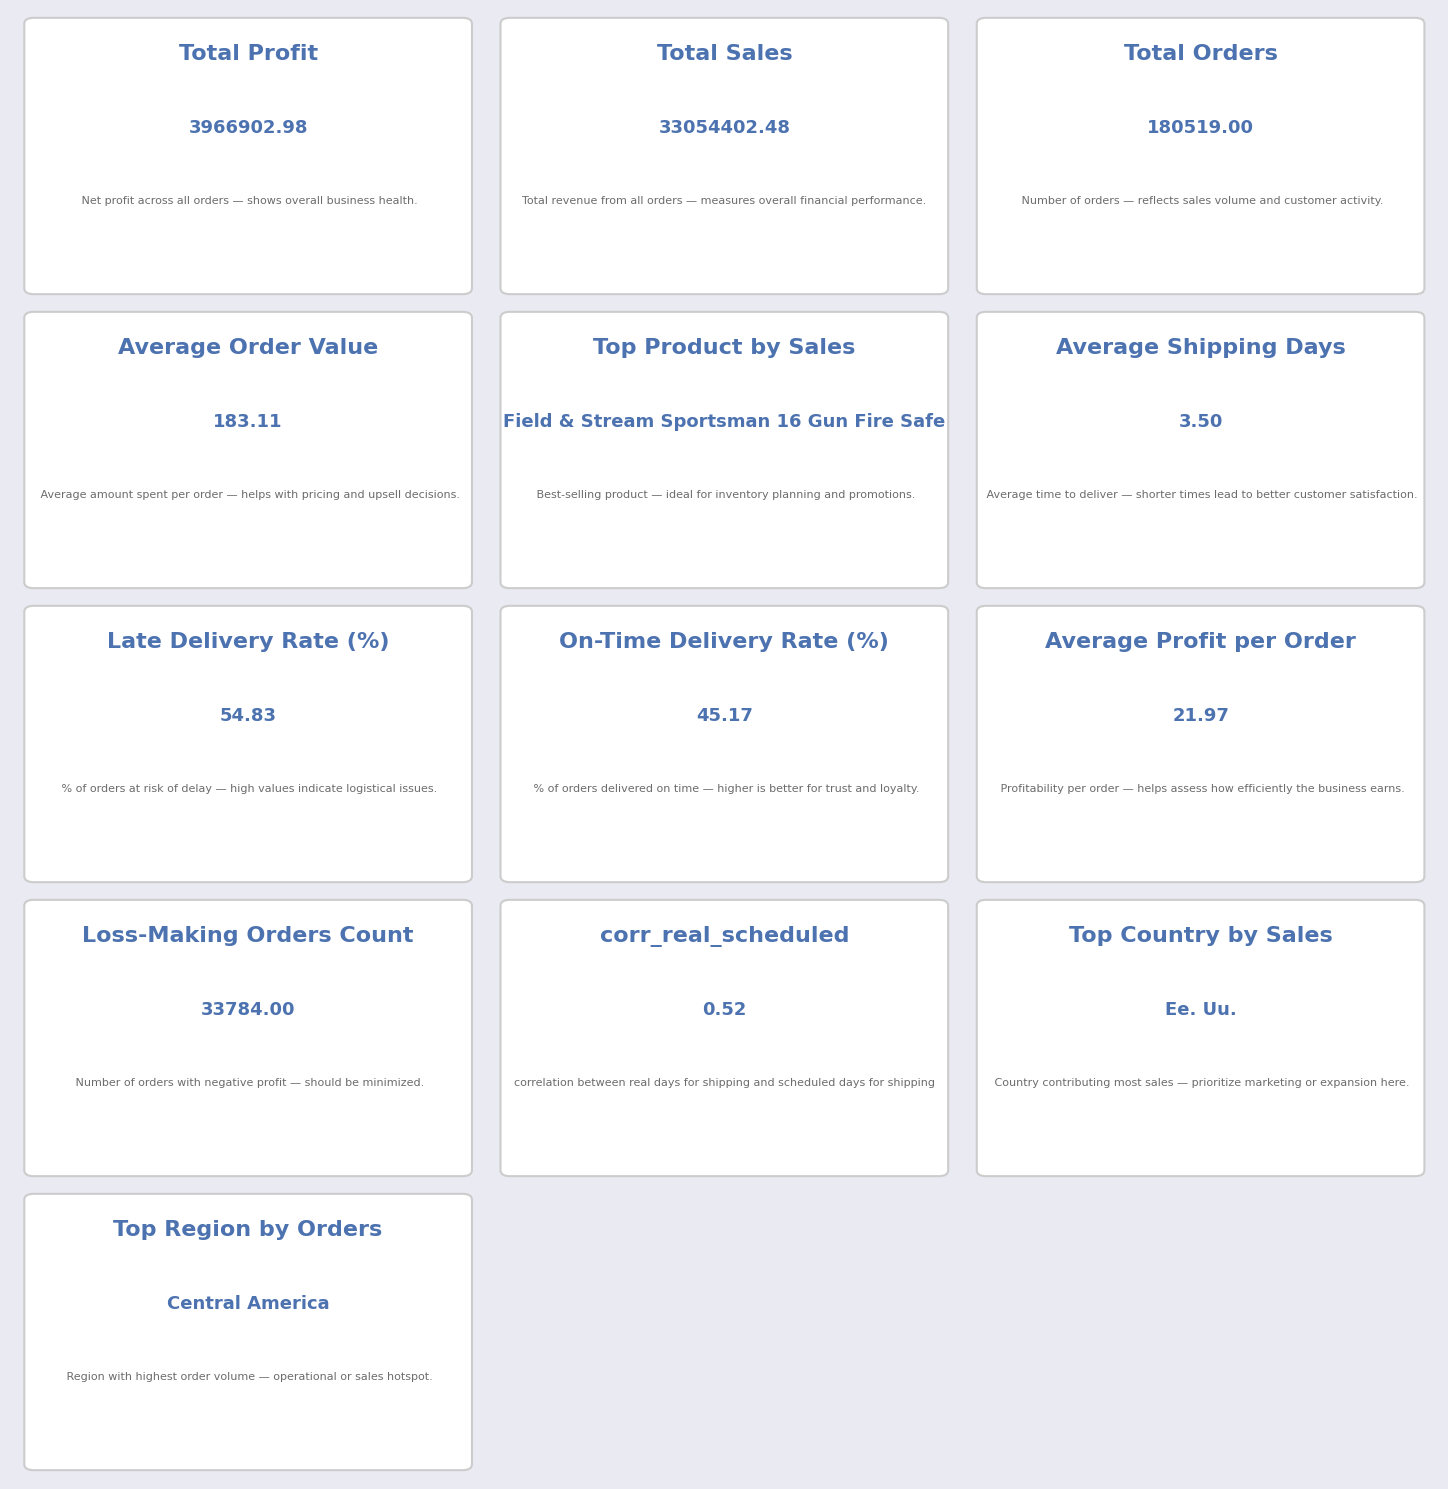

In [49]:
# Number of KPIs per row
columns = 3
total_kpis = len(kpis)
rows = math.ceil(total_kpis / columns)

# Create figure
fig, ax = plt.subplots(figsize=(columns * 5, rows * 3))
ax.set_xlim(0, columns)
ax.set_ylim(0, rows)
ax.axis('off')
fig.patch.set_facecolor('#eaeaf2')  # Light gray-blue background

# Colors (ggplot-inspired)
card_color = "#ffffff"
border_color = "#cccccc"
title_color = "#4c72b0"     # ggplot blue
value_color = "#4c72b0"
desc_color = "#6c6c6c"

# Font sizes
title_size = 16
value_size = 13
desc_size = 8

for i, (kpi, value) in enumerate(kpis.items()):
    col = i % columns
    row = rows - 1 - i // columns
    x, y = col, row

    # Draw card
    rect = patches.FancyBboxPatch(
        (x + 0.05, y + 0.05), 0.9, 0.9,
        boxstyle="round,pad=0.02",
        linewidth=1.5,
        edgecolor=border_color,
        facecolor=card_color
    )
    ax.add_patch(rect)

    # Format value
    value_text = f"{value:.2f}" if isinstance(value, (int, float)) else str(value)
    description = descriptions.get(kpi, "")

    # Center points
    center_x = x + 0.5
    top_y = y + 0.85
    mid_y = y + 0.6
    bottom_y = y + 0.35

    # KPI Title
    ax.text(center_x, top_y, kpi, fontsize=title_size, fontweight='bold',
            color=title_color, ha='center', va='center')

    # KPI Value
    ax.text(center_x, mid_y, value_text, fontsize=value_size, fontweight='bold',
            color=value_color, ha='center', va='center')

    # KPI Description
    ax.text(center_x, bottom_y, description, fontsize=desc_size,
            color=desc_color, ha='center', va='center', wrap=True)

plt.tight_layout()
plt.show()
